# Hands on!

In [370]:
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
%matplotlib inline

In [371]:
pd.read_csv?

Signature:
pd.read_csv(
    filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]',
    *,
    sep: 'str | None | lib.NoDefault' = <no_default>,
    delimiter: 'str | None | lib.NoDefault' = None,
    header: "int | Sequence[int] | None | Literal['infer']" = 'infer',
    names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>,
    index_col: 'IndexLabel | Literal[False] | None' = None,
    usecols: 'list[HashableT] | Callable[[Hashable], bool] | None' = None,
    dtype: 'DtypeArg | None' = None,
    engine: 'CSVEngine | None' = None,
    converters: 'Mapping[Hashable, Callable] | None' = None,
    true_values: 'list | None' = None,
    false_values: 'list | None' = None,
    skipinitialspace: 'bool' = False,
    skiprows: 'list[int] | int | Callable[[Hashable], bool] | None' = None,
    skipfooter: 'int' = 0,
    nrows: 'int | None' = None,
    na_values: 'Sequence[str] | Mapping[str, Sequence[str]] | None' = None,
    keep_default_na: 'bool' = True,
    n

In [372]:
df = pd.read_csv('data/crash_catalonia.csv')

In [373]:
df.head()

,Sunday,13664
0,Monday,17279
1,Tuesday,17337
2,Wednesday,17394
3,Thursday,17954
4,Friday,19147


In [374]:
df = pd.read_csv('data/crash_catalonia.csv', header=None)

In [375]:
df.head()

,0,1
0,Sunday,13664
1,Monday,17279
2,Tuesday,17337
3,Wednesday,17394
4,Thursday,17954


In [376]:
df.columns = ['Day of Week', 'Number of Crashes']

In [377]:
df.shape

(7, 2)

In [378]:
df.head()

,Day of Week,Number of Crashes
0,Sunday,13664
1,Monday,17279
2,Tuesday,17337
3,Wednesday,17394
4,Thursday,17954


In [379]:
df.tail()

,Day of Week,Number of Crashes
2,Tuesday,17337
3,Wednesday,17394
4,Thursday,17954
5,Friday,19147
6,Saturday,15714


In [380]:
df.tail(3)

,Day of Week,Number of Crashes
4,Thursday,17954
5,Friday,19147
6,Saturday,15714


In [381]:
df.dtypes

Day of Week          object
Number of Crashes     int64
dtype: object

In [382]:
df.set_index('Day of Week', inplace=True)

In [383]:
df.head()

,Number of Crashes
Day of Week,
Sunday,13664
Monday,17279
Tuesday,17337
Wednesday,17394
Thursday,17954


In [384]:
df.loc['Monday']

Number of Crashes    17279
Name: Monday, dtype: int64

# Putting everything together

In [385]:
df = pd.read_csv('data/crash_catalonia.csv', header=None)
df.columns = ['Day of Week', 'Number of Crashes']
df.set_index('Day of Week', inplace=True)

In [386]:
df.head()

,Number of Crashes
Day of Week,
Sunday,13664
Monday,17279
Tuesday,17337
Wednesday,17394
Thursday,17954


In [387]:
df = pd.read_csv('data/crash_catalonia.csv', header=None,
names = ['Day of Week', 'Number of Crashes'],
index_col=0
)

In [388]:
df.head()

,Number of Crashes
Day of Week,
Sunday,13664
Monday,17279
Tuesday,17337
Wednesday,17394
Thursday,17954


In [389]:
df.loc['Monday']

Number of Crashes    17279
Name: Monday, dtype: int64

# Plotting basics

<Axes: title={'center': 'Car accidents'}, xlabel='Day of Week'>

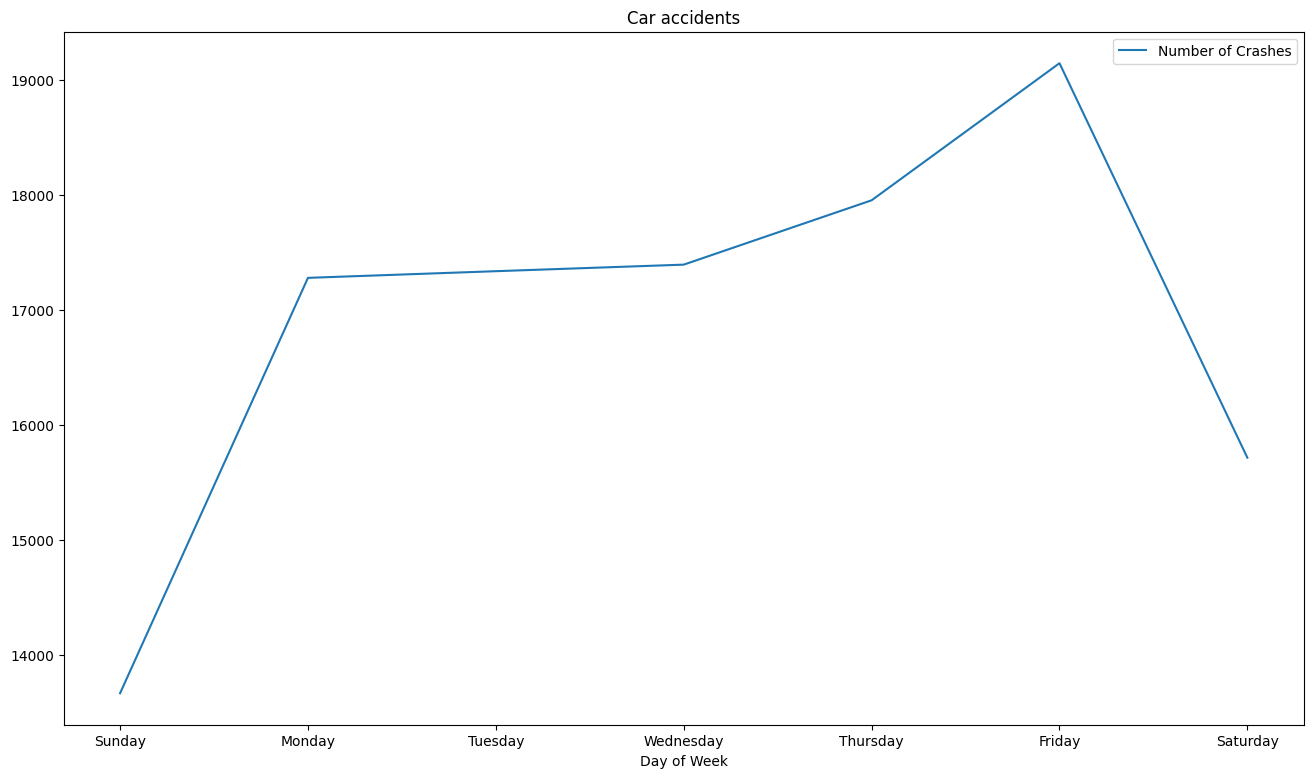

In [390]:
df.plot(title='Car accidents', figsize=(16, 9))

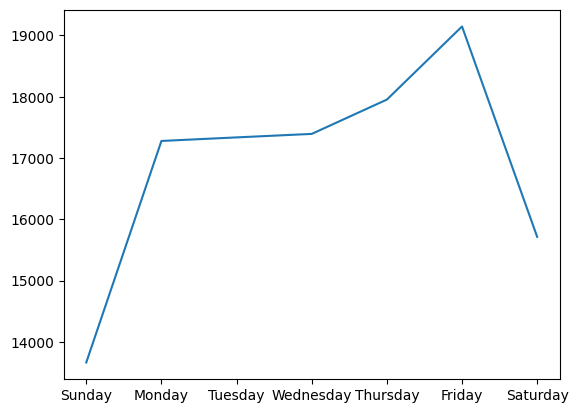

In [391]:
plt.plot(df.index, df['Number of Crashes'])

In [392]:
x = np.arange(-10, 11)

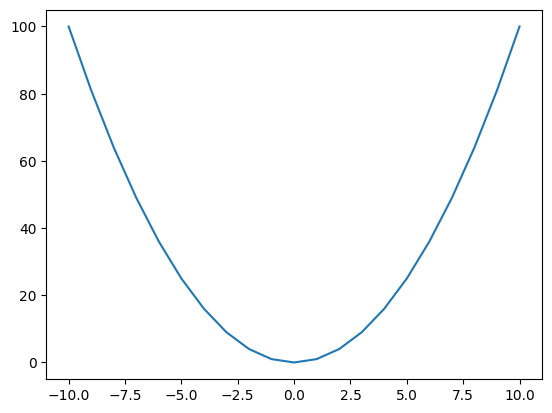

In [393]:
plt.plot(x, x ** 2)

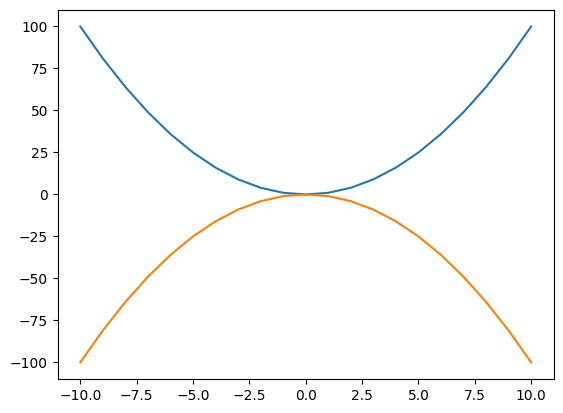

In [394]:
plt.plot(x, x ** 2)
plt.plot(x, -1 * (x ** 2))

Text(0.5, 1.0, 'My Nice Plot')

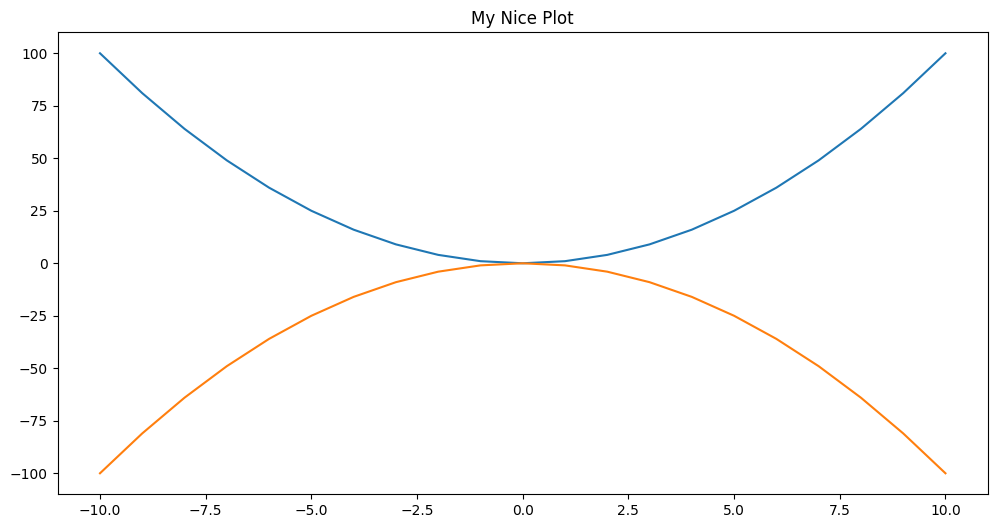

In [395]:
plt.figure(figsize=(12, 6))
plt.plot(x, x ** 2)
plt.plot(x, -1 * (x ** 2))
plt.title('My Nice Plot')

# A more challenging parsing

In [396]:
alcohol = pd.read_csv(
    'data/alcohol_sell_catalonia.csv',
    header=None,
    names=['Day of Week', 'Sells'],
    index_col=0
)
alcohol.head()

,Sells
Day of Week,
Sunday,15664.0
Monday,18279.0
Tuesday,19337.0
Wednesday,19394.0
Thursday,NaN


In [397]:
correlation = pd.DataFrame(index=df.index)

In [398]:
correlation.head()

""
Day of Week
Sunday
Monday
Tuesday
Wednesday
Thursday


In [399]:
correlation['Crashes'] = df['Number of Crashes']
correlation['Sells'] = alcohol['Sells']

In [400]:
correlation.head()

,Crashes,Sells
Day of Week,,
Sunday,13664,15664.0
Monday,17279,18279.0
Tuesday,17337,19337.0
Wednesday,17394,19394.0
Thursday,17954,NaN


<Axes: xlabel='Day of Week'>

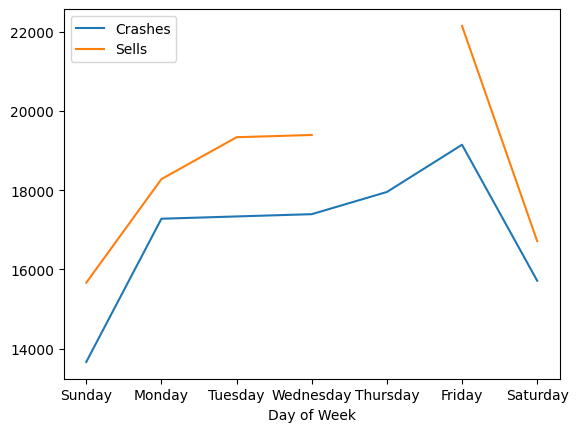

In [401]:
correlation.plot()

<Axes: xlabel='Day of Week'>

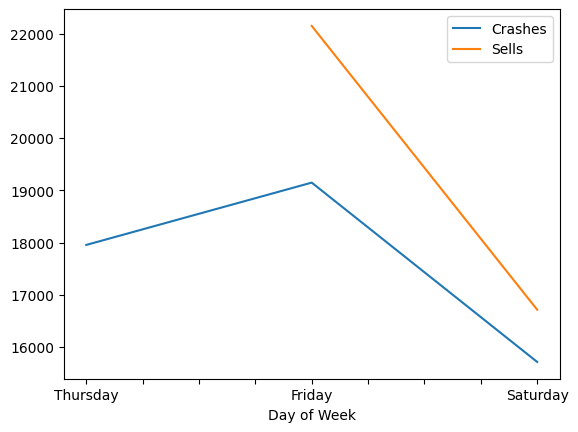

In [402]:
correlation.loc['Thursday' : 'Saturday'].plot()